In [1]:
%matplotlib inline

from chemicaldatautils.frequencies import termsFrequency, termPerCompound
from chemicaldatautils.load_data import loadDataset
from chemicaldatautils.compute_memberships import membershipMatrix
import matplotlib.pyplot as plt

# Loading the dataset
cids, smiles, names, formulas, terms, treeids, tset = loadDataset('Dataset.tab')

The data set was preprocessed in order to keep only one of all the duplicated compounds (i.e. those with the same SMILES) and discarding the terms with absolute frequency <20 (if a compound was associated with only 1 term or with all terms with frequency <20, than it was excluded, otherwise only the term was excluded from the term list associated with the compound).

From initial ~15'000 compounds and 489 terms, now they are: 

In [2]:
print(len(cids), len(tset))

10336 213


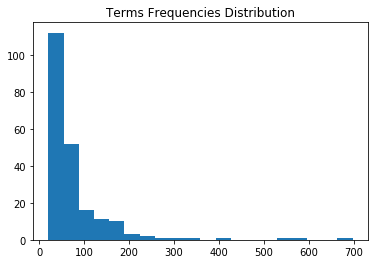

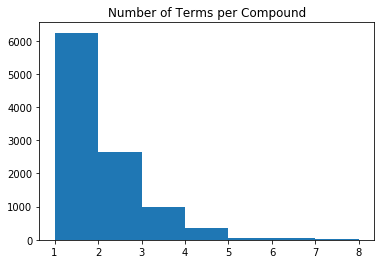

In [3]:
# "memberships" matrix: each row represents a term, the i-th is 1/0 if the i-th compound is/isn't associated with
# the term
m, term_labels = membershipMatrix(tset, terms)

# absolute frequency for each term (i.e. how many times the term is present in the dataset)
frequency = termsFrequency(m)
# number of terms associated with each compound
terms_per_cp = termPerCompound(m)

plt.figure(1)
plt.hist(frequency, bins=20)
plt.title("Terms Frequencies Distribution")
plt.figure(2)
plt.hist(terms_per_cp, bins=7)
plt.title("Number of Terms per Compound")
plt.show()